In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sklearn.__version__
%matplotlib inline

In [2]:
df = pd.read_csv("wine.csv")

In [3]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

# Train Test Spliting 

In [5]:
X = df.drop(['target'], axis=1)
y = df['target']
print(X.shape)
print(y.shape)

(178, 13)
(178,)


In [6]:
print("----------X coloumn-------- ")
print(X.head())
print("----------Y coloumn-------- ")
print(y.head())

----------X coloumn-------- 
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)


In [9]:
print("X train set shpae - ",X_train.shape)
print("y train set shpae - ",y_train.shape)
print("X test set shpae - ",X_test.shape)
print("y test set shpae - ",y_test.shape)

X train set shpae -  (142, 13)
y train set shpae -  (142,)
X test set shpae -  (36, 13)
y test set shpae -  (36,)


In [31]:
knn = KNeighborsClassifier(n_neighbors=1)
knn

KNeighborsClassifier(n_neighbors=1)

In [32]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [33]:
knn.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([2, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 1, 0, 0, 1,
       1, 0, 0, 0, 2, 1, 2, 0, 0, 0, 1, 2, 1, 2], dtype=int64)

In [34]:
pred=knn.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)*100

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


66.66666666666666

In [35]:
pd.Series(pred).value_counts() # getting the count of each category 

1    14
0    12
2    10
dtype: int64

In [36]:
y_test.value_counts()

1    14
0    13
2     9
Name: target, dtype: int64

In [16]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [18]:
# knn.predict([[5.1, 4, 4, 3]])

In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.82      0.64      0.72        14
           2       0.42      0.56      0.48         9

    accuracy                           0.67        36
   macro avg       0.67      0.66      0.66        36
weighted avg       0.70      0.67      0.68        36



In [20]:
print(confusion_matrix(y_test,pred))

[[10  0  3]
 [ 1  9  4]
 [ 2  2  5]]


In [21]:
dt = confusion_matrix(y_test, pred)

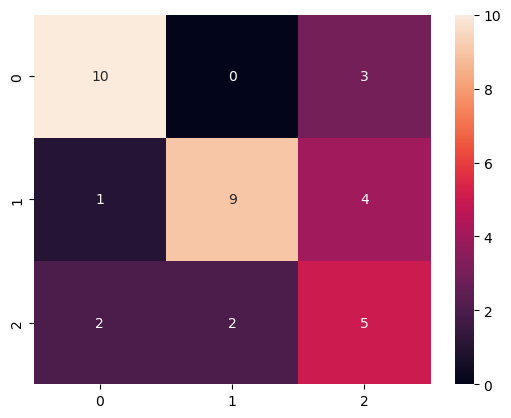

In [22]:
sns.heatmap(dt,annot=True)
plt.savefig('ConfusionK-NN.png')

## Cross Validation with K Value

#### Choosing a K Value
So, we will find the number of neighbour(k=?) which has the low error rate.

Let's go ahead and use the elbow method to pick a good K Value:

In [46]:
error_rate = []

# Will take some time
for i in range(51,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [47]:
error_rate

[0.3055555555555556,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3055555555555556,
 0.3055555555555556,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3055555555555556,
 0.3333333333333333,
 0.3055555555555556,
 0.3055555555555556,
 0.3333333333333333,
 0.3611111111111111,
 0.3055555555555556,
 0.3055555555555556,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3055555555555556,
 0.3055555555555556,
 0.3055555555555556,
 0.2777777777777778,
 0.2777777777777778,
 0.2777777777777778,
 0.2777777777777778,
 0.2777777777777778,
 0.2777777777777778,
 0.2777777777777778,
 0.2777777777777778,
 0.2777777777777778,
 0.2777777777777778,
 0.2777777777777778,
 0.2777777777777778,
 0.2777777777777778,
 0.2777777777777778,
 0.2777777777777778,
 0.2777777777777778,
 0.2777777777

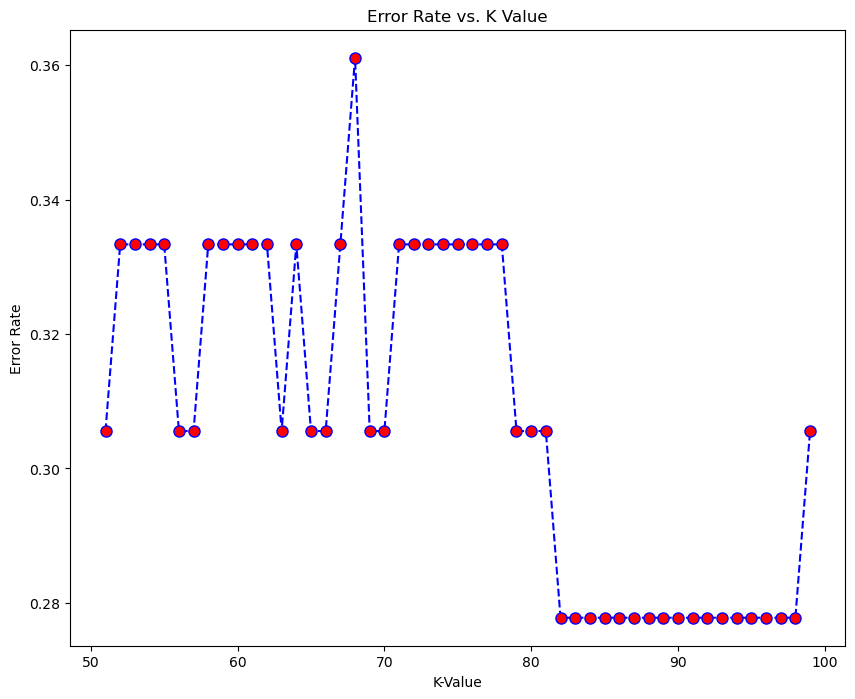

In [51]:
plt.figure(figsize=(10,8))
plt.plot(range(51,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')
plt.savefig('Error Rate vs. K-Value visulization.png')

In [52]:
# NOW WITH K=90
knn90 = KNeighborsClassifier(n_neighbors=90)

knn90.fit(X_train,y_train)
pred1 = knn90.predict(X_test)

print('WITH K=90')
print('\n')
print(classification_report(y_test,pred1))

WITH K=90


              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.62      0.93      0.74        14
           2       0.60      0.33      0.43         9

    accuracy                           0.72        36
   macro avg       0.74      0.68      0.68        36
weighted avg       0.75      0.72      0.71        36



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [53]:
cmknn90 = confusion_matrix(y_test,pred1)
cmknn90

array([[10,  2,  1],
       [ 0, 13,  1],
       [ 0,  6,  3]], dtype=int64)

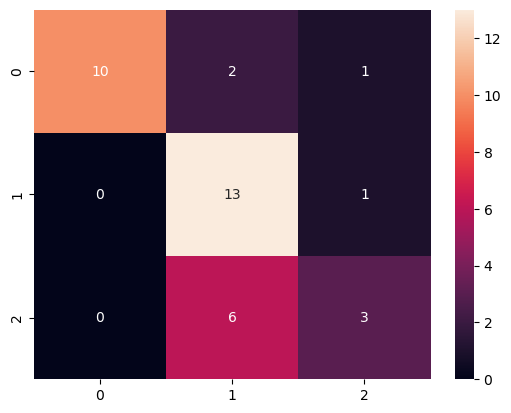

In [54]:
sns.heatmap(cmknn90,annot=True)
plt.savefig('confusionK-NN(90_neighbor).png')

In [59]:
print("testing Accuracy of k = 90","\n")
knn90.score(X_test,y_test)

testing Accuracy of k = 90 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7222222222222222

# MUCH Better with K-fold cross Validation